In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
from tqdm.auto import tqdm
import pandas as pd
os.chdir("..")

In [2]:
from car_tracking.frame_generator import FrameGen
from car_tracking.background_subtractor import BackgroundSubstraction
from car_tracking.car_extractor import CarExtractor
from car_tracking.car_extractor import ExtractionReport
from car_tracking.tracker import Tracker

In [3]:
video_path = 'data/highway.mp4'
sample_rate = 2 

In [4]:
gen = FrameGen(video_path, sample_rate, 50)

In [5]:
bs = BackgroundSubstraction(batch_size=25, inner_sample_rate = 2)
bs.fit(gen)
b1 = bs.get_background(10)

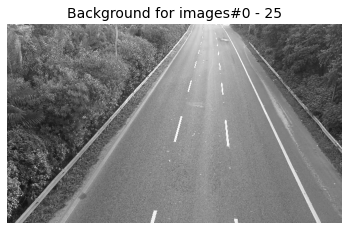

In [6]:
bs.visualize()

In [7]:
car_extract = CarExtractor(bs, 3, 9, 500)
selected_bboxes, selected_sources  = car_extract.run(gen)

In [8]:
extraction_report = ExtractionReport(gen, selected_bboxes, selected_sources)
extraction_report.report

,bbox_xywh,frame
bbox_idx,,
0,"(554, 325, 49, 55)",0
1,"(544, 303, 45, 77)",1
2,"(535, 283, 42, 77)",2
3,"(528, 266, 39, 73)",3
4,"(520, 250, 37, 71)",4
5,"(514, 236, 35, 70)",5
6,"(508, 223, 34, 66)",6
7,"(503, 212, 32, 60)",7
8,"(499, 201, 29, 58)",8


In [9]:
extraction_report.save_crops('outputs/saved_crops/')

In [10]:
tracker = Tracker(extraction_report, 0.05)
tracker.run(gen)

In [11]:
tracker.tracking_df

,bbox_xywh,frame,track_id
bbox_idx,,,
0,"(554, 325, 49, 55)",0,0
1,"(544, 303, 45, 77)",1,0
2,"(535, 283, 42, 77)",2,0
3,"(528, 266, 39, 73)",3,0
4,"(520, 250, 37, 71)",4,0
5,"(514, 236, 35, 70)",5,0
6,"(508, 223, 34, 66)",6,0
7,"(503, 212, 32, 60)",7,0
8,"(499, 201, 29, 58)",8,0


In [12]:
tracker.save_by_trackid(gen, 'outputs/tracks/')